In [54]:
! pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
! pip install matplotlib seaborn


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
# import the dataset from sklearn
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
text = """
Research on K-value selection method of K-means clustering algorithm; technical
Performance of K-means clustering algorithm with different distance metrics; technical
Introduction to the K-means clustering algorithm based on the elbow method; technical
Effect of distance metrics in determining k-value in K-means clustering using elbow and silhouette method; technical
K-means clustering with incomplete data; technical
Use of latent class analysis and K-means clustering to identify complex patient profiles; medicine
Covid-19 cases and deaths in southeast Asia clustering using K-means algorithm; medicine
K-means clustering of Covid-19 cases in Indonesia's provinces; medicine
Brain tumor segmentation using K-means clustering and deep learning with synthetic data augmentation for classification; medicine
Skin cancer detection from dermoscopic images using deep learning and fuzzy K-means clustering; medicine
Diagnosis of grape leaf diseases using automatic K-means clustering and machine learning; agriculture
K-means algorithm for clustering system of plant seeds specialization areas in east Aceh; agriculture
Plant disease detection and recognition using K-means clustering; agriculture
Plant leaf recognition using texture features and semi-supervised spherical K-means clustering; agriculture
Segmentation of leaf spots disease in apple plants using particle swarm opti-mization and K-means algorithm; agriculture"""

In [58]:
! pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import pandas as pd
import re

# Define the regular expression pattern to extract information
pattern = r'(?P<Title>.*?); (?P<Category>.*?)$'

# Create an empty list to store the extracted data
data = []

# Split the text into lines and extract information using regex
for line in text.strip().split('\n'):
    match = re.search(pattern, line)
    if match:
        data.append(match.groupdict())

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                                                Title     Category
0   Research on K-value selection method of K-mean...    technical
1   Performance of K-means clustering algorithm wi...    technical
2   Introduction to the K-means clustering algorit...    technical
3   Effect of distance metrics in determining k-va...    technical
4             K-means clustering with incomplete data    technical
5   Use of latent class analysis and K-means clust...     medicine
6   Covid-19 cases and deaths in southeast Asia cl...     medicine
7   K-means clustering of Covid-19 cases in Indone...     medicine
8   Brain tumor segmentation using K-means cluster...     medicine
9   Skin cancer detection from dermoscopic images ...     medicine
10  Diagnosis of grape leaf diseases using automat...  agriculture
11  K-means algorithm for clustering system of pla...  agriculture
12  Plant disease detection and recognition using ...  agriculture
13  Plant leaf recognition using texture features ...  agricul

In [60]:
! pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')

stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [62]:
df.head()

,Title,Category
0,Research on K-value selection method of K-mean...,technical
1,Performance of K-means clustering algorithm wi...,technical
2,Introduction to the K-means clustering algorit...,technical
3,Effect of distance metrics in determining k-va...,technical
4,K-means clustering with incomplete data,technical


In [63]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [64]:
df['cleaned'] = df['Title'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [65]:

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [66]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

c:\Users\Jakne\Desktop\Andre\AdditionalAssignment\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
clusters

array([0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1])

In [68]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [69]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [70]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
recognition,using,plant,distance,metrics,elbow,value,clustering,method,algorithm

Cluster 1
disease,segmentation,deep,detection,recognition,data,learning,leaf,using,clustering

Cluster 2
disease,detection,deep,data,distance,using,algorithm,clustering,covid,cases


In [71]:
# map clusters to appropriate labels 
cluster_map = {0: "technical", 1: "agriculture", 2: "medicine"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

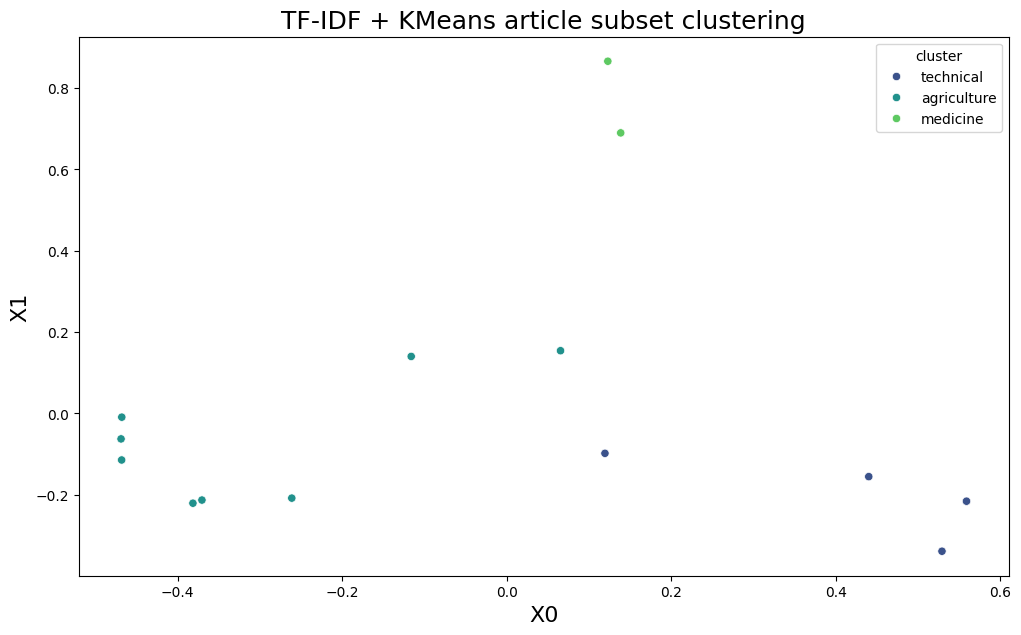

In [72]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans article subset clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [73]:
# the true cluster labels are stored in Category, the assigned clusters are stored in cluster
print(df['Category'].head())
print(df['cluster'].head())

0    technical
1    technical
2    technical
3    technical
4    technical
Name: Category, dtype: object
0      technical
1      technical
2      technical
3      technical
4    agriculture
Name: cluster, dtype: object


In [74]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Extract true cluster labels and assigned clusters
true_labels = df['Category']
assigned_clusters = df['cluster']

# Encode true cluster labels (Category column)
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Encode assigned clusters (cluster column)
assigned_clusters_encoded = label_encoder.transform(assigned_clusters)

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels_encoded, assigned_clusters_encoded)

# Compute the Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(true_labels_encoded, assigned_clusters_encoded)

# Compute the Silhouette Score
true_labels_encoded = true_labels_encoded.reshape(-1, 1)
silhouette = silhouette_score(true_labels_encoded, assigned_clusters_encoded)

# Print the evaluation metrics
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Silhouette Score: {silhouette}")

Adjusted Rand Index (ARI): 0.20795107033639143
Normalized Mutual Information (NMI): 0.39848344633270016
Silhouette Score: 0.04732683982683984
